<h1 style="color:purple;">Predicting if a Customer Subscribes for Fixed Term Deposit - Bank Telemarketing</h1>

### Project by Siddarth Karuka

Data Source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('./bank-additional/bank-additional-full.csv',delimiter=';')

<h2 style="color:purple;">Input variables:</h2>

<h3 style="color:purple;">Bank client data:</h3>

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

<h3 style="color:purple;">Related with the last contact of the current campaign:</h3>

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

<h3 style="color:purple;">Other attributes:</h3>

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

<h3 style="color:purple;">Social and economic context attributes:</h3>

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric) <a href="https://www.euribor-rates.eu/">More info here</a>

20 - nr.employed: number of employees - quarterly indicator (numeric)

<h2 style="color:purple;">Output variable (desired target):</h2>

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

---

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

In [5]:
data.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

---

No NANs or empty fields

But we can see fields with "unknown" values, which I would like to remove from my data

---

In [6]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
objects_list = ['job','marital','education','default','housing','loan','contact','month','day_of_week',
               'poutcome','y']

In [8]:
mask = np.column_stack([data[col].str.contains(r"unknown", na=False) for col in objects_list])
unknown_data=data.loc[mask.any(axis=1)]
unknown_data.shape

(10700, 21)

---

It looks like 10700 out of 41188 rows have some column with an unknown value. 

It's better to remove all those rows as to not affect my data analysis

---

In [9]:
clean_data = data
clean_data=clean_data.drop(unknown_data.index)
clean_data.shape

(30488, 21)

---

check that clean_data no longer has any rows with "unknown" values:

---

In [10]:
new_mask = np.column_stack([clean_data[col].str.contains(r"unknown", na=False) for col in objects_list])
clean_data.loc[new_mask.any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


---

In the next step I would like to convert all categorical values to numerical values. There are a few ways to do this that I know of:
* get_dummies from pandas
* LabelEncoder from sklearn
* OneHotEncoder from sklearn

I'll use LabelEncoder. Based on my understanding, it shouldn't have issues when using with Decision Trees, but one should be careful when using LabelEncoder because it can create unwanted patterns

But first I'll change the easier binary classifications like "loan", "default", "housing", "contact", and the target variable

---

In [11]:
for col in ['loan','default','housing','y']:
    clean_data[col].replace(to_replace='yes',value=1,inplace=True)
    clean_data[col].replace(to_replace='no',value=0,inplace=True)
    clean_data[col].replace(to_replace='unknown',value=3,inplace=True)
clean_data['contact'].replace(to_replace='cellular',value=1,inplace=True)
clean_data['contact'].replace(to_replace='telephone',value=0,inplace=True)
clean_data['contact'].replace(to_replace='unknown',value=3,inplace=True)

In [12]:
clean_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,0,0,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [13]:
new_objects_list = ['job','marital','education','month','day_of_week','poutcome']

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in objects_list:
    clean_data[col] = le.fit_transform(clean_data[col])

In [15]:
clean_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,0,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,0,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,0,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,0,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,0,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [16]:
X = clean_data.loc[:,clean_data.columns!='y']
y = clean_data.loc[:,'y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 7);

---

Gini Decision Tree:


In [17]:
clf= DecisionTreeClassifier(min_samples_split=1000, random_state=1, splitter = "random" )
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
print('accuracy score: ',accuracy_score(y_true = y_test, y_pred = predictions))
print('precision score: ',precision_score(y_true = y_test, y_pred = predictions))

accuracy score:  0.8874311204408292
precision score:  0.7020057306590258


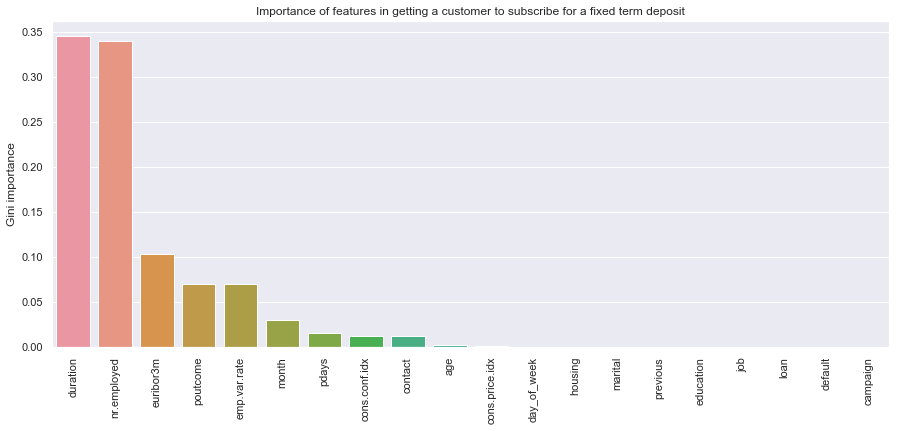

In [18]:
z=clf.feature_importances_
listt=X.columns.values
plot_data = pd.DataFrame({'listt':listt,'z':z})
plot_data.sort_values(by='z',ascending=False,inplace=True)
plt.figure(figsize=(15,6))
sns.barplot(plot_data.listt, plot_data.z)
plt.xticks(rotation='vertical')
plt.ylabel('Gini importance')
plt.xlabel('')
plt.title('Importance of features in getting a customer to subscribe for a fixed term deposit');

---

Entropy Decision Tree:


In [19]:
clf_entropy = DecisionTreeClassifier(min_samples_split=1000, random_state=1, criterion='entropy' , splitter = "random")
clf_entropy = clf_entropy.fit(X_train, y_train)
predictions = clf_entropy.predict(X_test)
print('accuracy score: ',accuracy_score(y_true = y_test, y_pred = predictions))
print('precision score: ',precision_score(y_true = y_test, y_pred = predictions))

accuracy score:  0.8947782734190501
precision score:  0.6165680473372781


---

Logistic Regression:


In [20]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver='liblinear') 
model_lr.fit(X_train,y_train)
model_lr_predictions = model_lr.predict(X_test)
print('accuracy score: ',accuracy_score(y_true = y_test, y_pred = model_lr_predictions))
print('precision score: ',precision_score(y_true = y_test, y_pred = model_lr_predictions))

accuracy score:  0.9018630280766203
precision score:  0.7081260364842454


---

We can see that almost all three classifiers we tested have high accuracy scores, but lower precision scores. This could be because of the skewed distribution in the target variable. 

Let's take a look:


In [22]:
clean_data['y'].value_counts()

0    26629
1     3859
Name: y, dtype: int64

It looks like only 3859 customers subscribed to a fixed term deposit, where as 26629 did not. 

We could do some data processing like random undersampling to overcome this issue, which would reduce the total number of rows to 3859. Remember that we already cleaned up 10700 rows because of some of the fields having unknown values. So we would lose greater than 90% of the data with this procedure. 

In [41]:
clean_data_train, clean_data_test = train_test_split(clean_data, test_size=0.25, random_state = 6);
new_X_train = clean_data_train.loc[:,clean_data_train.columns!='y']
new_y_train = clean_data_train.loc[:,'y']
new_X_test = clean_data_test.loc[:,clean_data_test.columns!='y']
new_y_test = clean_data_test.loc[:,'y']

In [42]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
new_X_train_rus, new_y_train_rus, id_rus = rus.fit_sample(new_X_train, new_y_train)

---
Logistic Regression:

In [43]:
rus_lr = LogisticRegression(solver='liblinear') 
rus_lr.fit(new_X_train_rus,new_y_train_rus)
rus_lr_predictions = model_lr.predict(new_X_test)
print('accuracy score: ',accuracy_score(y_true = new_y_test, y_pred = model_lr_predictions))
print('precision score: ',precision_score(y_true = new_y_test, y_pred = model_lr_predictions))

accuracy score:  0.8489897664654946
precision score:  0.45177111716621254


In [44]:
rus_clf= DecisionTreeClassifier(min_samples_split=1000, random_state=1, splitter = "random" )
rus_clf.fit(new_X_train_rus,new_y_train_rus)
rus_predictions = clf.predict(new_X_test)
print('accuracy score: ',accuracy_score(y_true = y_test, y_pred = rus_predictions))
print('precision score: ',precision_score(y_true = y_test, y_pred = rus_predictions))

accuracy score:  0.8336394647074259
precision score:  0.11898016997167139


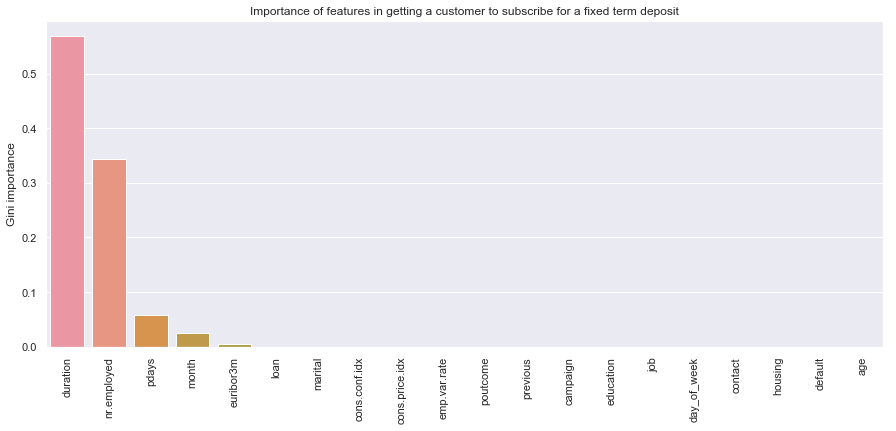

In [45]:
z=rus_clf.feature_importances_
listt=X.columns.values
plot_data = pd.DataFrame({'listt':listt,'z':z})
plot_data.sort_values(by='z',ascending=False,inplace=True)
plt.figure(figsize=(15,6))
sns.barplot(plot_data.listt, plot_data.z)
plt.xticks(rotation='vertical')
plt.ylabel('Gini importance')
plt.xlabel('')
plt.title('Importance of features in getting a customer to subscribe for a fixed term deposit');

It looks like the precision score drops when we undersample. I currently have no idea why. I'll need to look into it more (currently learning more about machine learning, and will revisit this when I learn more)